# LinearRegression Pure (thuần)

In [27]:
import pandas as pd
import numpy as np

def my_linear_regression(w_init, X, y, lr, esilon, epoches=10000):
    w = w_old = w_init
    ep = 0
    N, d = X.shape[0], X.shape[1]

    # Vòng lặp Gradient Descent:
    # Lặp lại cho đến khi tiêu chuẩn hội tụ (epsilon) được đáp ứng hoặc số lượng vòng lặp tối đa (epoches) được đạt.
    while ep < epoches:
        w = w - lr*np.dot(X.T, (np.dot(X, w) - y))/N

        if np.linalg.norm(w - w_old)/d < esilon:
            print(np.linalg.norm(w - w_old)/d)
            break

        w_old = w
        ep += 1
        if ep % 1000 == 0:
            print("epoches = ", ep, end=" ")
            print("loss = ", np.linalg.norm(np.dot(X, w) - y)/N)
        
    return w


if __name__ == "__main__":
    X = []
    # Code you have previously used to load data
    iowa_file_path = './USA_Housing.csv'
    data = pd.read_csv(iowa_file_path)
    df = pd.DataFrame(data)
    # xử lý dữ liệu
    data = df.dropna()
    data = data.drop(["Address"], axis=1)
    data = data.drop(data[data["Avg. Area Income"] == 0].index)
    data = data.drop(data[data["Avg. Area House Age"] == 0].index)
    data = data.drop(data[data["Avg. Area Number of Rooms"] == 0].index)
    data = data.drop(data[data["Avg. Area Number of Bedrooms"] == 0].index)
    data = data.drop(data[data["Area Population"] == 0].index)
    data = data.drop(data[data["Price"] == 0].index)

    # min và max hóa dữ liệu
    data["Avg. Area Income"] = (data["Avg. Area Income"] -
                                data["Avg. Area Income"].min())/(data["Avg. Area Income"].max()-data["Avg. Area Income"].min())
    data["Avg. Area House Age"] = (data["Avg. Area House Age"] -
                                      data["Avg. Area House Age"].min())/(data["Avg. Area House Age"].max()-data["Avg. Area House Age"].min())
    data["Avg. Area Number of Rooms"] = (data["Avg. Area Number of Rooms"] -
                                            data["Avg. Area Number of Rooms"].min())/(data["Avg. Area Number of Rooms"].max()-data["Avg. Area Number of Rooms"].min())
    data["Avg. Area Number of Bedrooms"] = (data["Avg. Area Number of Bedrooms"] -
                                                data["Avg. Area Number of Bedrooms"].min())/(data["Avg. Area Number of Bedrooms"].max()-data["Avg. Area Number of Bedrooms"].min())
    data["Area Population"] = (data["Area Population"] -
                                    data["Area Population"].min())/(data["Area Population"].max()-data["Area Population"].min())
    data["Price"] = (data["Price"] -
                            data["Price"].min())/(data["Price"].max()-data["Price"].min())
    
    x1 = np.array(data["Avg. Area Income"]).reshape(-1, 1)
    x2 = np.array(data["Avg. Area House Age"]).reshape(-1, 1)
    x3 = np.array(data["Avg. Area Number of Rooms"]).reshape(-1, 1)
    x4 = np.array(data["Avg. Area Number of Bedrooms"]).reshape(-1, 1)
    x5 = np.array(data["Area Population"]).reshape(-1, 1)
    y = np.array(data["Price"]).reshape(-1, 1)
    X = np.concatenate((x1, x2, x3, x4, x5), axis=1)
    print("len(X) = ", len(X))
    X_test = X[4000:, :]
    y_test = y[4000:]
    X = X[:4000, :]
    y = y[:4000]
    # print("X=",X)
    # print("y=",y)
    X_bar = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    X_test_bar = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
    A = np.dot(X_bar.T, X_bar)
    B = np.dot(X_bar.T, y)
    w1 = np.dot(np.linalg.pinv(A), B)
    w_init = np.random.randn(X_bar.shape[1], 1)
    w = my_linear_regression(w_init, X_bar, y, 0.05, 1e-10, 100000)
    print("w = ", w)
    print("w1 = ", w1)
    result = np.concatenate(
        (y.reshape(-1, 1), np.dot(X_bar, w).reshape(-1, 1), np.dot(X_bar, w1).reshape(-1, 1)), axis=1)

    mean_y = np.mean(y)
    # mae test
    print("len(X_test) = ", len(X_test))
    mae_test = np.mean(abs(np.dot(X_test_bar, w) - y_test))
    mae1_test = np.mean(abs(np.dot(X_test_bar, w1) - y_test))
    print("mae_test = ", mae_test)
    print("mae1_test = ", mae1_test)
    print("%mae_test/mean_y = ", mae_test/mean_y*100, "%")
    print("%mae1_test/mean_y = ", mae1_test/mean_y*100, "%")
    # mse test
    mse_test = np.mean((np.dot(X_test_bar, w) - y_test)**2)
    mse1_test = np.mean((np.dot(X_test_bar, w1) - y_test)**2)
    print("mse_test = ", mse_test)
    print("mse1_test = ", mse1_test)


len(X) =  5000
epoches =  1000 loss =  0.0027819768019553435
epoches =  2000 loss =  0.0018423486118712964
epoches =  3000 loss =  0.0012984194067678294
epoches =  4000 loss =  0.0009874430404069995
epoches =  5000 loss =  0.0008175158784088562
epoches =  6000 loss =  0.0007300748335542936
epoches =  7000 loss =  0.0006873946583430372
epoches =  8000 loss =  0.0006672767929444365
epoches =  9000 loss =  0.0006579725829928238
epoches =  10000 loss =  0.000653708978901067
epoches =  11000 loss =  0.0006517633172422596
epoches =  12000 loss =  0.0006508770216006331
epoches =  13000 loss =  0.0006504735924986948
epoches =  14000 loss =  0.000650290011186556
epoches =  15000 loss =  0.0006502064810853626
epoches =  16000 loss =  0.0006501684759163111
epoches =  17000 loss =  0.0006501511841581262
epoches =  18000 loss =  0.0006501433166678748
epoches =  19000 loss =  0.0006501397370664672
epoches =  20000 loss =  0.0006501381083915789
epoches =  21000 loss =  0.0006501373673628117
epoches =

# LinearRegression Library (hàm thư viện)

In [28]:
# Code you have previously used to load data
import pandas as pd

# Path of the file to read
iowa_file_path = './USA_Housing.csv'

home_data = pd.read_csv(iowa_file_path)
home_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Missing Value

In [3]:
# Đếm số lượng giá trị bị thiếu trong mỗi cột
missing_values = home_data.isnull().sum()

# Hiển thị số lượng giá trị bị thiếu
missing_values

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# Outliers

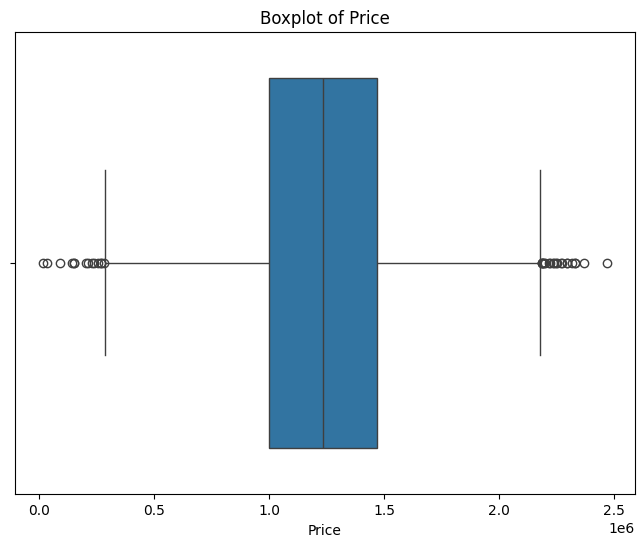

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ví dụ về boxplot cho cột 'Price' trong dữ liệu
plt.figure(figsize=(8, 6))
sns.boxplot(x=home_data['Price'])
plt.title('Boxplot of Price')
plt.show()


In [5]:
# Loại bỏ các dòng có 'Price' cao hơn ngưỡng
upper_threshold = 2000000
home_data = home_data[home_data['Price'] < upper_threshold]

# Loại bỏ các dòng có 'Price' thấp hơn ngưỡng
lower_threshold = 500000
home_data = home_data[home_data['Price'] > lower_threshold]


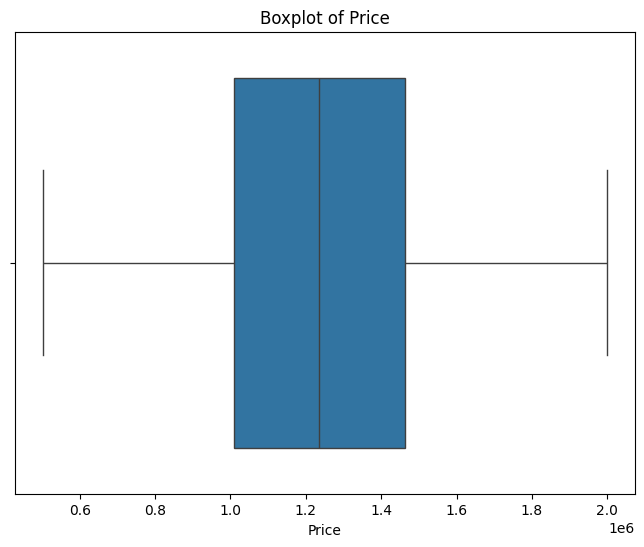

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ví dụ về boxplot cho cột 'Price' trong dữ liệu
plt.figure(figsize=(8, 6))
sns.boxplot(x=home_data['Price'])
plt.title('Boxplot of Price')
plt.show()


# Feature Selection

In [7]:
# Create the list of features below
feature_names = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']

# select data corresponding to features in feature_names
X = home_data[feature_names]
y = home_data.Price

# Review Data

In [8]:
X.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
count,4829.000000,4829.000000,4829.000000,4829.000000
mean,68631.173030,5.981569,6.990018,36219.821571
std,10228.405642,0.979918,0.988695,9791.566310
min,35454.714659,2.797215,3.236194,172.610686
25%,61688.682939,5.339340,6.313062,29506.487348
50%,68854.090852,5.976152,7.007676,36215.962546
75%,75582.459765,6.647406,7.661923,42857.370958
max,104702.724257,9.519088,10.144988,69621.713378


In [9]:
y.describe()

count    4.829000e+03
mean     1.235602e+06
std      3.191051e+05
min      5.025531e+05
25%      1.009094e+06
50%      1.234610e+06
75%      1.462899e+06
max      1.998369e+06
Name: Price, dtype: float64

# Split data

In [10]:
from sklearn.model_selection import train_test_split
# Break off validation set from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                      random_state=0)
print(len(X_train))
print(len(X_test))

3380
1449


# Fit Model

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

# Make Predictions


In [12]:
# Get validation predictions and MAE
y_predict = model.predict(X_test)

# Chuyển đổi các giá trị dự đoán sang dạng chuỗi định dạng số thực
formatted_predictions = ['{:.2f}'.format(prediction) for prediction in y_predict]

# Tạo DataFrame từ dữ liệu định dạng lại
output = pd.DataFrame({'HouseIndex': X_test.index,
                       'PredictPrice': formatted_predictions})

# Xuất ra file CSV mà không bao gồm cột index
output.to_csv('submission.csv', index=False)
output.head()


,HouseIndex,PredictPrice
0,4821,1431548.26
1,2619,1006208.25
2,1406,1576047.10
3,4796,1260699.91
4,4790,1333996.58


# Evalution MAE

In [13]:
mae = mean_absolute_error(y_test, y_predict)
print("MAE (trung bình sai số):", mae)

# Giá trị trung bình của biến mục tiêu (giá nhà trung bình)
avg = y_test.mean()
print("Giá nhà trung bình:", avg)

print("Phần trăm sai số của MAE so với giá nhà trung bình: ", round(mae / avg * 100, 2), '%')

MAE (trung bình sai số): 92605.45857366575
Giá nhà trung bình: 1234747.024953508
Phần trăm sai số của MAE so với giá nhà trung bình:  7.5 %


# Visualization Result


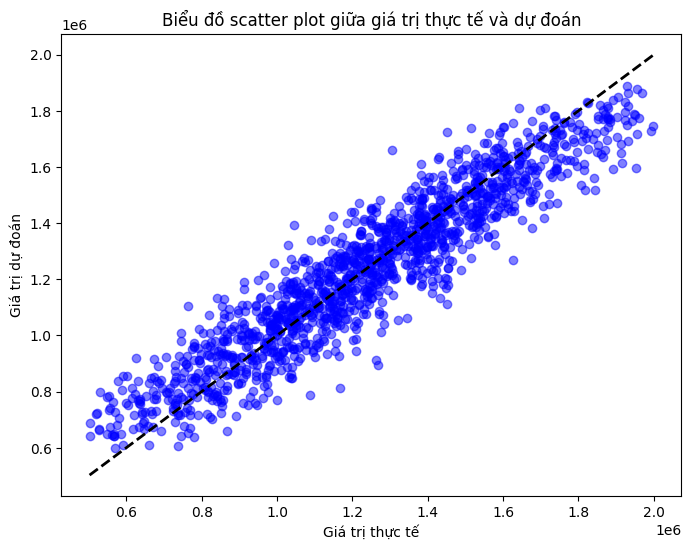

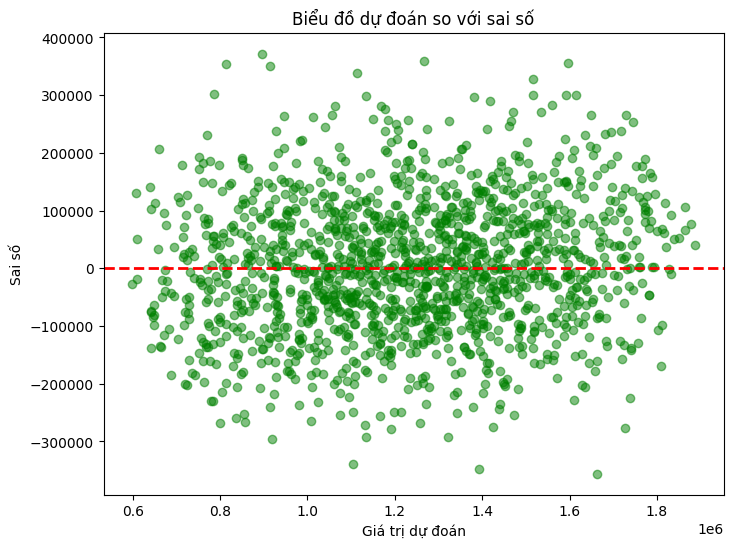

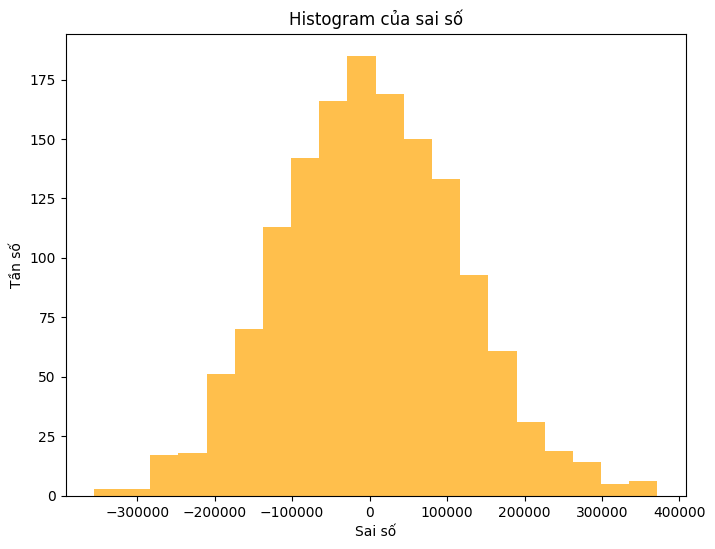

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử y_test và y_predict là hai mảng chứa giá trị thực tế và giá trị dự đoán tương ứng
# Cần phải đảm bảo rằng y_test và y_predict có cùng độ dài

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Đường chéo 45 độ
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Biểu đồ scatter plot giữa giá trị thực tế và dự đoán')
plt.show()

# Biểu đồ dự đoán so với sai số
residuals = y_test - y_predict
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Sai số')
plt.title('Biểu đồ dự đoán so với sai số')
plt.show()

# Histogram của sai số
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='orange', alpha=0.7)
plt.xlabel('Sai số')
plt.ylabel('Tần số')
plt.title('Histogram của sai số')
plt.show()

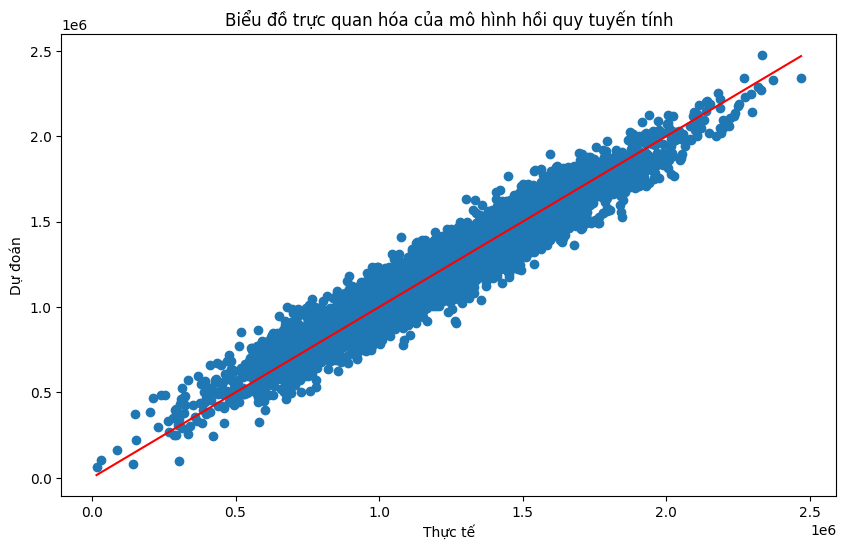

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Đọc dữ liệu từ file CSV
data = pd.read_csv("USA_Housing.csv")

# Chọn các đặc trưng và nhãn
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X, y)

# Dự đoán giá nhà
predictions = model.predict(X)

# Vẽ biểu đồ trực quan hóa dữ liệu và đường hồi quy
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Vẽ đường chéo màu đỏ
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Vẽ đường chéo màu đỏ
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.title('Biểu đồ trực quan hóa của mô hình hồi quy tuyến tính')
plt.show()


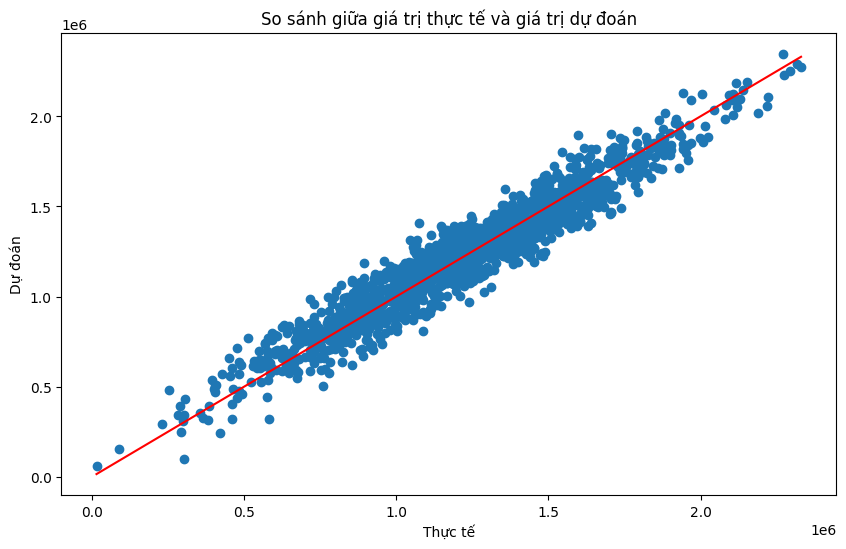

1. Mean Squared Error (MSE): 10234801281.43498
2. Mean Absolute Error (MAE): 81268.78885984475
3. R squared (R^2): 0.9217011044215624
4. Adjusted R squared: 0.9214390599249813
5. Root Mean Squared Error (RMSE): 101167.19468995363
6. Mean Absolute Percentage Error (MAPE): 7.744047032720614
7. Mean Percentage Erro (MPE): -1.10715433818507
Price [0][0] :  79545.45857431678
Price [0][0] :  1059033.5578701235
% Difference MAE :  6.596103613420085 %


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hàm tính trọng số w0, w1 cho hồi quy tuyến tính
def linear_regression(X_train, y_train):
    # Tính toán số lượng mẫu và số lượng đặc trưng
    m, n = X_train.shape
    
    # Thêm cột 1 vào ma trận X (cho w0)
    X_with_bias = np.c_[np.ones((m, 1)), X_train]
    
    # Tính toán trọng số w
    w = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y_train)
    
    return w

# Hàm dự đoán giá nhà dựa trên trọng số và đặc trưng đầu vào
def predict(X, w):
    # Thêm cột 1 vào ma trận X (cho w0)
    X_with_bias = np.c_[np.ones((len(X), 1)), X]
    
    # Dự đoán giá nhà
    predictions = X_with_bias.dot(w)
    
    return predictions

# Hàm tính Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Hàm tính Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Hàm tính R squared (R^2)
def r_squared(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Hàm tính Adjusted R squared
def adjusted_r_squared(y_true, y_pred, n_features):
    r2 = r_squared(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - n_features - 1))
    return adjusted_r2

# Hàm tính Root Mean Squared Error (RMSE)
def rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return np.sqrt(mse)

# Hàm tính Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

# Hàm tính Mean Percentage Error (MPE)
def mpe(y_true, y_pred):
    mpe = np.mean((y_true - y_pred) / y_true) * 100
    return mpe

# Đọc dữ liệu từ file CSV
data = pd.read_csv("USA_Housing.csv")

# Chọn các đặc trưng và nhãn
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (70-30)
np.random.seed(42)  # Để đảm bảo kết quả được tái tạo
random_indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))

X_train = X.iloc[random_indices[:train_size]]
y_train = y.iloc[random_indices[:train_size]]
X_test = X.iloc[random_indices[train_size:]]
y_test = y.iloc[random_indices[train_size:]]

# Huấn luyện mô hình hồi quy tuyến tính và dự đoán giá nhà trên tập kiểm tra
w = linear_regression(X_train, y_train)
predictions = predict(X_test, w)

# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Vẽ đường chéo màu đỏ
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.title('So sánh giữa giá trị thực tế và giá trị dự đoán')
plt.show()

# Dữ liệu thử nghiệm
m, n = X_train.shape

# In kết quả
print("1. Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
print("2. Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
print("3. R squared (R^2):", r_squared(y_test, predictions))
print("4. Adjusted R squared:", adjusted_r_squared(y_test, predictions, n))
print("5. Root Mean Squared Error (RMSE):", rmse(y_test, predictions))
print("6. Mean Absolute Percentage Error (MAPE):", mape(y_test, predictions))
print("7. Mean Percentage Erro (MPE):", mpe(y_test, predictions))

print('Price [0][0] : ', data.iloc[0, 0])
print('Price [0][0] : ',data['Price'].iloc[0])
print('% Difference MAE : ', mean_absolute_error(y_test, predictions) * 100 / np.mean(data['Price']), '%')
# Độ chênh lệch giữa giá dự đoán và giá thực tế trung bình so với Giá trung bình là 6% . 
# Nghĩa là sai số có thể là 6% 
data.head()